# _ASA_ for HTML
This is a presentation of an exemplary usage of _**ASA**_'s (_**Automatic Sentiment Analyser**_) core functions.
_Automatic Sentiment Analyser_ is a simple Python program (written without the _NLTK_ package) that allows to process a given text
and present its emotional markedness with the use of statistical data, based on positive and negative
connotations.
<p align="center">
<img src="https://i.ibb.co/RbF1K1D/asatitle.png" width="300" height="300"/>

The main aim of this presentation is to demonstrate the usefulness of _**ASA**_ for summarising
information presented in a large set of data when it comes to emotionality. As sentiment needs a certain subject, reviews
are an exceptional example of getting only the most important information from a text. However, the full spectrum of possibilities and
functions provided by _ASA_ (such as saving png and txt files, counting the most frequent positive and negative words or analysis based on a keyword)
can be found in the <i>asa_project.py</i> file in the same folder. In the table below, a comparison of _ASA_ in its basic form (used for this presentation)
and the full version of _ASA_ can be seen.

ASA Basic | Full ASA
------------ | -------------
_JSON_ | _JSON_
stopwords excluded | stopwords excluded/included
generating plots | generating and saving plots
calculating the sentiment value | calculating the sentiment value
**X** | counting the most frequent positive and negative words
**X** | saving the output in a txt file
**X** | keyword analysis support

### Preparing the data
In order to gather the required data, it is crucial to get access to the source of a given website written in HTML.
Regardless of the fact that the data could be scraped manually, it is favourable to operate with Python along with a number of modules
([_urllib_](https://docs.python.org/3/library/urllib.html), [_nltk_](https://www.nltk.org/), [_bs4_](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)).
Firstly, the _urllib_ module shall be used to draw the text from a website, which, for the sake of this presentation, is
a review of a _Cyberpunk 2077_ video game.

In [1]:
from urllib import request
url = "https://www.washingtonpost.com/video-games/reviews/cyberpunk-three-months-later/"
html = request.urlopen(url).read().decode('utf8')

To clean the HTML data, from which it might be difficult to read, the _NLTK_ and _BeautifulSoup_ module are to be used.
_BeautifulSoup_ is responsible here for cleaning the text from all the unnecessary data (including meta tags, an image map, _JavaScript_, forms, and tables)
and save the output in a variable (variable _raw_ in the example). Subsequently, the <i>word_tokenize</i> package
creates a list of tokens (words) from the raw data assembled in the previous line.

In [2]:
from nltk import word_tokenize
from bs4 import BeautifulSoup
raw = BeautifulSoup(html, 'html.parser').get_text()
tokens = word_tokenize(raw)

### Presenting and preparing _ASA_
The core functions of _ASA_ need to be defined first. the <i>plot_create()</i> function is responsible for gathering the
crucial statistics calculated in one of the following functions. Furthermore, this function processes with the statistics and
generates two simple plots, which will be visible in the final part of this presentation.

In [3]:
def plot_create(positive, negative, pos_words, neg_words):
    num_positive_words = len(pos_words)
    num_negative_words = len(neg_words)
    if num_positive_words > 0 and num_negative_words > 0:
        import matplotlib.pyplot as plt
        left = [2, 20]
        heights = [int(num_positive_words), int(num_negative_words)]
        plt.subplot(121)
        bar_width = 10
        plt.bar(left, heights, bar_width, color=('g', 'r'))
        plt.title('Word Frequencies')
        plt.xticks([2, 20], ['Positive', 'Negative'])
        plt.minorticks_on()
        plt.grid()

        data_val = [positive, negative]
        plt.subplot(122)
        slice_labels = ['Positive', 'Negative']
        plt.pie(data_val, shadow=True,
                autopct='%1.1f%%', labels=slice_labels, colors=('g', 'r'))
        plt.title("Sentiment Values")
        plt.show()

For automatic sentiment analysis, it is necessary to prepare data that will model the examined text. Thus, reject all stopwords,
which are irrelevant and assign the remaining words to one of two lists: with **positive** or **negative** connotations.
_ASA_ has been originally created for sentiment analysis without the _NLTK_ module hence the same model will be applied here.
The data crucial for the analysis, saved in a _json_ file in the main folder of the program, is composed of four lists: 'positive',
'negative', 'stopwords' and 'reverse'.

The first three lists have been already mentioned. The fourth one, however, deals with negations such
as _don't_ in 'I don't like this setting'. Without the 'reverse' list, the program would analyse this sentence as positive, which is not true.

In [4]:
def data_from_json():
    import json
    with open('data_words.json') as json_file:
        database = json.load(json_file)
        positive = database['positive']
        negative = database['negative']
        stopwords = database['stopwords']
        reverse = database['reverse']
    return positive, negative, stopwords, reverse

The _verdict()_ function uses the difference of two values (positive and negative) to form a verdict and print it to the user.
What is more, the output of this function depends on the length of the examined text.

For example, if the analysed data is longer than 1000 words and <i>val_sentiment</i> equals 15, the program will decide that
the sentiment value of the text is slightly positive.

In [5]:
def verdict(val_sentiment, database):
    data_length = len(database)
    if data_length >= 1000:
        if 20 > val_sentiment > 0:
            print("The sentiment value of the text is slightly positive. (" + str(val_sentiment) + ")")
        elif -20 < val_sentiment < 0:
            print("The sentiment value of the text is slightly negative. (" + str(val_sentiment) + ")")
        elif 20 < val_sentiment <= 70:
            print("The sentiment value of the text is positive. (" + str(val_sentiment) + ")")
        elif -20 > val_sentiment >= -70:
            print("The sentiment value of the text is negative. (" + str(val_sentiment) + ")")
        elif val_sentiment > 70:
            print("The sentiment value of the text is highly positive. (" + str(val_sentiment) + ")")
        elif val_sentiment < -70:
            print("The sentiment value of the text is highly negative. (" + str(val_sentiment) + ")")
    if data_length < 1000:
        if 5 > val_sentiment > 0:
            print("The sentiment value of the text is slightly positive. (" + str(val_sentiment) + ")")
        elif -5 < val_sentiment < 0:
            print("The sentiment value of the text is slightly negative. (" + str(val_sentiment) + ")")
        elif 5 < val_sentiment <= 10:
            print("The sentiment value of the text is positive. (" + str(val_sentiment) + ")")
        elif -5 > val_sentiment >= -10:
            print("The sentiment value of the text is negative. (" + str(val_sentiment) + ")")
        elif val_sentiment > 10:
            print("The sentiment value of the text is highly positive. (" + str(val_sentiment) + ")")
        elif val_sentiment < -10:
            print("The sentiment value of the text is highly negative. (" + str(val_sentiment) + ")")

### Starting the analysis
Lastly, the core of _ASA_ should run before calling all the previously mentioned functions. The program opens the _json_ file
to be able to save each list in a separate variable. Then, it investigates which words from the 'tokens' list belong to the 'stopwords' list and does not
save them in the new list ('data'). After creating all the required variables, the program starts a _while_ loop to analyse
the 'data' list.

If a word is present in the 'positive' list and is not preceded by a word from the 'reverse' list, the
<i>sentiment</i> variable grows by 1, <i>positive_val</i> grows by 1 as well, and the program appends the word to the <i>positive_words</i>
list.

In [6]:
positive_list, negative_list, stopwords_list, reverse_list = data_from_json()
data = []
for word in tokens:
    if word not in stopwords_list:
        data.append(word)
data = [word.strip('.,!;()?:[]\"') for word in data]
sentiment = 0
positive_val = 0
negative_val = 0
positive_words = []
negative_words = []
index = 0
while index < len(data):
    if str(data[index]).lower() in positive_list:
        if data[index - 1] in reverse_list:
            sentiment -= 1
            negative_val += 1
            index += 1
        else:
            sentiment += 1
            positive_val += 1
            positive_words.append(data[index])
            index += 1
    elif str(data[index]).lower() in negative_list:
        if data[index - 1] in reverse_list:
            sentiment += 1
            positive_val += 1
            index += 1
        else:
            sentiment -= 1
            negative_val += 1
            negative_words.append(data[index])
            index += 1
    else:
        index += 1

The previously mentioned functions now can be called as all the needed variables already contain the data.

The sentiment value of the text is slightly negative. (-6)


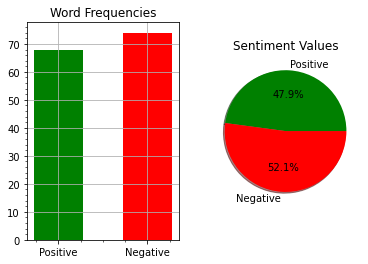

In [7]:
def main():
    verdict(sentiment, data)
    plot_create(positive_val, negative_val, positive_words, negative_words)


main()

The program's output presented to the user is the sentiment value of the text, which equalled -6. This value describes the
text as slightly negative towards the main aspect of this review, _Cyberpunk 2077_ video game. Furthermore, the program presents the
two plots generated in the <i>plot_create()</i> function. As one can see, the overall amount of words from both positive and negative lists
equals circa 140 units which, after calculations, does not provide extreme negative vision on the text. Therefore, the sentiment value is only **slightly negative**.

With all the possible functions of _ASA_, the analysis would provide much more information. Nevertheless, the idea behind
analysing reviews of video games, films, books, etc. might give limitless possibilities. Effectively designed automatic sentiment analysis can serve
as a tool for a rapid summary of a given text and as reviews base on the positive/negative axis, they are excellent for such
tool.